## Figures for Precambrian Research Submission - OFP
## **Tables**
  
Connor S. van Wieren, 2023

In [3]:
import numpy as np
import random
random.seed(10)
import numpy.polynomial.polynomial as pl
from scipy.spatial import ConvexHull
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap as lm
from matplotlib.patches import Patch
from matplotlib.patches import Rectangle
import matplotlib.transforms as transforms
from matplotlib import colors
import matplotlib
import pandas as pd
import seaborn as sns
from VanStrat.VanStrat_simple import *
import string
from scipy.ndimage import rotate
from matplotlib.ticker import FuncFormatter
import matplotlib.gridspec as gridspec
import pickle
import dill
import sys
sys.path.insert(0, '/Users/cvanwieren/Library/CloudStorage/Dropbox/GitHub/Useful_Code')
from funcs import *
%matplotlib inline

plt.rcParams['figure.figsize'] = (5.5, 3.5)
%config InlineBackend.figure_format='retina'

sns.set_style('ticks',{'axes.edgecolor':'.3',
                       'xtick.color':'.3',
                       'ytick.color':'.3',
                       'text.color': '.3',
                       'axes.labelcolor':'.3',
                       'axes.grid': False,
                       'grid.linestyle': u'-.'})

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'

# matplotlib.rcParams['pdf.fonttype'] = 42
# matplotlib.rcParams['ps.fonttype'] = 42

pd.set_option('display.max_columns', None)  
pd.set_option('display.max_rows', None)  
pd.set_option('display.max_colwidth', None)

fig_dir = '/Users/cvanwieren/Library/CloudStorage/Dropbox/GitHub/Publications/OFP_PC/img/'

# load pickle
filename = './pickles/ofp_data.pkl'
dill.load_session(filename)

# read excels
secs = pd.read_excel(home+'./sections/sections_com.xlsx') # sections 
# get rid of secs duplicates
secs = secs.dropna(subset=['d13c_carb']).reset_index(drop=True)

# Lump all Fold limbs for GSM Type into one section
secs.loc[secs['index'].str.contains('GSM Type'),'index'] = 'GSM Type'

clasts = pd.read_excel(home+'./ICTs/icts_com.xlsx') # ICT clasts
nods = pd.read_excel(home+'./hand_samples/nodules.xlsx') # GSM Authigenic Nodules
fans = pd.read_excel(home+'./hand_samples/fans.xlsx') # WMM aragonite fan clasts

# combine clasts and fans
clasts = pd.concat([clasts,fans]).reset_index(drop=True)

In [4]:
data = pd.read_csv('/Users/cvanwieren/Library/CloudStorage/Dropbox/GitHub/OFP/OFP/methods/OFP_isopach/OFP Isopach/ofp_thicknesses.csv')

In [5]:
d = data[data['id']=='csv'].reset_index(drop=True) # drop smith data
d1 = d[~d['locality'].str.contains('Arnica')].reset_index(drop=True) # drop localities not using
d1

,locality,id,id_cv,id_mds,lat_start,long_start,tlm_thick_m,gsm_thick_m,wmm_thick_m,ofp_thick_m,stdev,sampling
0,Temple Lake,csv,C201,LL1,51.366359,-116.168391,124.20,5.00,NaN,129.20,46.669048,secs
1,Railway,csv,C202,LL2,51.459862,-116.267307,NaN,NaN,7.60,7.60,15.105156,both
2,Boomerang,csv,C205,LL4,51.471651,-116.142053,NaN,NaN,171.40,171.40,8.980256,icts
3,Wolverine,csv,C206,LL5,51.435815,-116.080536,61.00,4.00,NaN,65.00,8.591347,both
4,GSM Type,csv,C101,JP1,52.872591,-118.291418,28.90,3.60,11.50,44.00,4.633965,both
5,GSM Type Fold Limb,csv,C101a,NaN,52.872591,-118.291418,16.71,2.36,10.43,29.50,7.848885,secs
6,GSM Type Thrust repeat,csv,C102,NaN,52.872824,-118.287136,17.85,NaN,NaN,17.85,15.105156,secs
7,Pyrite Point,csv,C105,JP2,52.861257,-118.064400,44.10,NaN,NaN,44.10,2.899138,secs
8,Marmot Ski,csv,C103,JP4,52.781676,-118.036099,23.10,NaN,NaN,23.10,15.105156,secs
9,McKale,csv,C209,MK1,53.480723,-120.107131,NaN,NaN,163.90,163.90,26.113453,both


In [6]:
# simplify localities
s = ['Temple Lake','Railway','Boomerang','Wolverine','GSM Type 1-3','GSM Type 2','GSM Type 4','Pyrite Point','Marmot Road','McKale Creek','Jasper, Highway 16']
l = d1['locality']
si = dict(zip(l,s))
d1['locality_simple'] = d1['locality'].map(si)
len(set (d1['locality_simple']))

11

In [7]:
# sort dataframe from north to south by region
d1 = d1.sort_values(by='lat_start', ascending=False).reset_index(drop=True)

In [8]:
d1 = d1.drop(d1.index[[3]])
d1['num'] = np.arange(1,len(d1)+1)
d2 = d1[['num','locality_simple','lat_start','long_start']]

In [9]:
# rename columns
r = {'num':'Label',
     'locality_simple':'Locality',
     'lat_start':'Latitude',
     'long_start':'Longitude'}
d2 = d2.rename(columns=r)

In [10]:
# add regions
reg = ['McBride, BC','Jasper, AB','','','','','Lake Louise, AB','','','']
d2.insert(0,'Region',reg)
d2

,Region,Label,Locality,Latitude,Longitude
0,"McBride, BC",1,McKale Creek,53.480723,-120.107131
1,"Jasper, AB",2,GSM Type 4,52.872824,-118.287136
2,,3,GSM Type 1-3,52.872591,-118.291418
4,,4,Pyrite Point,52.861257,-118.064400
5,,5,"Jasper, Highway 16",52.860418,-118.185932
6,,6,Marmot Road,52.781676,-118.036099
7,"Lake Louise, AB",7,Boomerang,51.471651,-116.142053
8,,8,Railway,51.459862,-116.267307
9,,9,Wolverine,51.435815,-116.080536
10,,10,Temple Lake,51.366359,-116.168391


In [11]:
# print(d2.to_latex(caption='caption',label='table:locs',position='htb!',index=False))

In [12]:
s = d2.style.hide(axis='index')
print(s.to_latex(
    convert_css=True, hrules=True, position_float='centering',
    caption='caption',label='table:locs',position='htb!'))

\begin{table}[htb!]
\centering
\caption{caption}
\label{table:locs}
\begin{tabular}{lrlrr}
\toprule
Region & Label & Locality & Latitude & Longitude \\
\midrule
McBride, BC & 1 & McKale Creek & 53.480723 & -120.107131 \\
Jasper, AB & 2 & GSM Type 4 & 52.872824 & -118.287136 \\
 & 3 & GSM Type 1-3 & 52.872591 & -118.291418 \\
 & 4 & Pyrite Point & 52.861257 & -118.064400 \\
 & 5 & Jasper, Highway 16 & 52.860418 & -118.185932 \\
 & 6 & Marmot Road & 52.781676 & -118.036099 \\
Lake Louise, AB & 7 & Boomerang & 51.471651 & -116.142053 \\
 & 8 & Railway & 51.459862 & -116.267307 \\
 & 9 & Wolverine & 51.435815 & -116.080536 \\
 & 10 & Temple Lake & 51.366359 & -116.168391 \\
\bottomrule
\end{tabular}
\end{table}



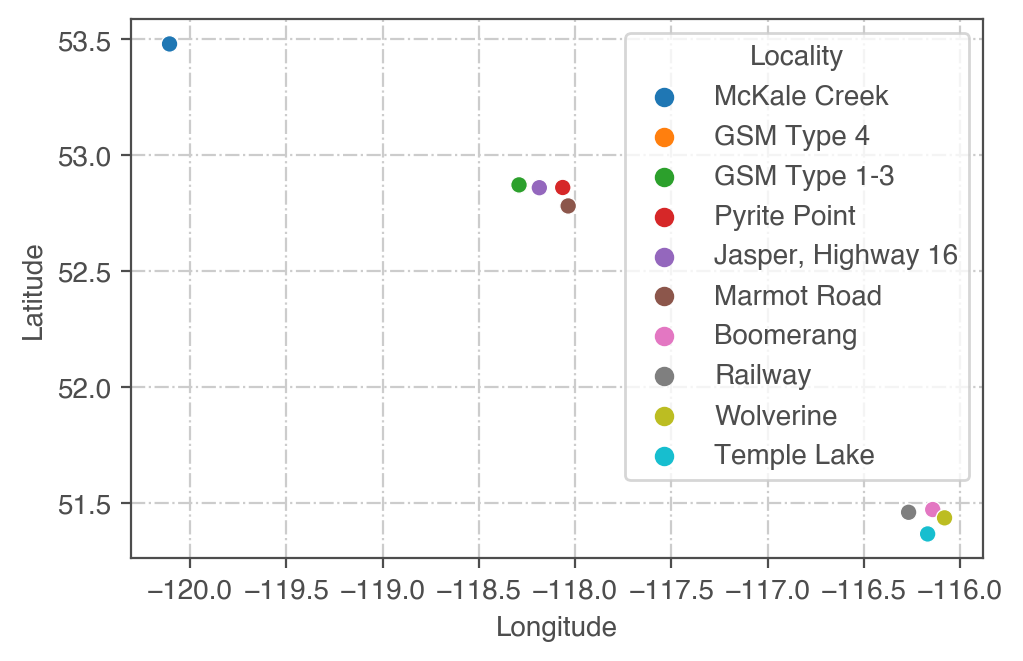

In [13]:
%matplotlib inline
sns.scatterplot(data=d2,x='Longitude',y='Latitude',hue='Locality')
plt.grid()